In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data_energy = pd.read_csv("C:\\Users\\hp\\Documents\\hamoye\\data\\energydata_complete.csv")
column_names = {"T1":"Kitchen_Temperature", "RH_1":"Kitchen_Humidity", "T2":"Living_Room_Temperature", "RH_2" : "Living_Room_Humidity",
                "T3" : "Laundry_Room_Temperature", "RH_3" : "Laundry_Room_Humidity", "T4" : "Office_Room_Temperature", "RH_4":"Office_Room_Humidity",
                "T5" : "Bathroom_Temperature", "RH_5" : "Bathroom_Humidity", "T6" : "Outside_North_Temperature", "RH_6": "Outside_North_Humidity",
                "T7" : "Ironing_Temperature", "RH_7" : "Ironing_Humidity", "T8" : "Teenager_Room_Temperature", "RH_8" : "Teenager_Room_Humidity",
                "T9" : "Parents_Room_Temperature", "RH_9" : "Parents_Room_Humidity", "To" : "Outside_Temperature", "RH_out": "Outside_Humidity"}

data_energy = data_energy.rename(columns=column_names)
data_energy = data_energy.drop(columns= ["date", "lights"])

In [3]:
data_energy.head()

,Appliances,Kitchen_Temperature,Kitchen_Humidity,Living_Room_Temperature,Living_Room_Humidity,Laundry_Room_Temperature,Laundry_Room_Humidity,Office_Room_Temperature,Office_Room_Humidity,Bathroom_Temperature,...,Parents_Room_Temperature,Parents_Room_Humidity,T_out,Press_mm_hg,Outside_Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


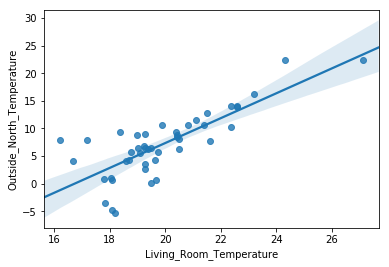

In [4]:
data_energy_linear_reg = data_energy[["Living_Room_Temperature","Outside_North_Temperature"]].sample(45, random_state=3)
sns.regplot(x = "Living_Room_Temperature", y = "Outside_North_Temperature", data = data_energy_linear_reg)

In [5]:
scaler = MinMaxScaler()
normalised_data_energy = pd.DataFrame(scaler.fit_transform(data_energy), columns = data_energy.columns)
features_data_energy = normalised_data_energy.drop(columns = ["Living_Room_Temperature", "Outside_North_Temperature"])
living_room_target = normalised_data_energy["Living_Room_Temperature"]

x_train, x_test, y_train, y_test = train_test_split(features_data_energy, living_room_target, test_size=0.3, random_state = 1)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

In [6]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.96

In [7]:
scaler = MinMaxScaler()
normalised_data_energy = pd.DataFrame(scaler.fit_transform(data_energy), columns = data_energy.columns)
features_data_energy = normalised_data_energy.drop(columns = ["Appliances","Living_Room_Temperature", "Outside_North_Temperature"])
appliances_target = normalised_data_energy["Appliances"]

x_train, x_test, y_train, y_test = train_test_split(features_data_energy, appliances_target, test_size=0.3, random_state = 42)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

In [8]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted_values)
round(mae, 2)

0.05

In [9]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [10]:
rss = (mean_squared_error(y_test, predicted_values)).sum()
round(rss, 2)

0.01

In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, "Linear_Model_Weight")
ridge_weights_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = "Features")
final_weights = pd.merge(final_weights, lasso_weights_df, on = "Features")

In [13]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Living_Room_Humidity,-0.259512,-0.250935,-0.000000
1,Parents_Room_Temperature,-0.200018,-0.195071,-0.000000
2,Teenager_Room_Humidity,-0.160347,-0.159663,-0.000111
3,Kitchen_Temperature,-0.128384,-0.124797,0.000000
4,T_out,-0.094262,-0.076359,0.000000
5,Ironing_Humidity,-0.050676,-0.050820,-0.000000
6,Outside_Humidity,-0.045187,-0.037140,-0.049557
7,Parents_Room_Humidity,-0.038158,-0.039221,-0.000000
8,Bathroom_Temperature,-0.031932,-0.033996,-0.000000
9,rv2,0.000659,0.000653,-0.000000
